# Prediction Using Supervised ML



Predicting the score of the students based on the number of study hours

Objective -> What will be the Score of the student if he/she studies 9.25 hours per day?

In [1]:
#Importing  libraries which are required
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [2]:
#Reading the dataset
data=pd.read_csv('Untitled 1.csv')
print('Data imported successfully')

Data imported successfully


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#getting some information about the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Plotting the scatter graph by which we can gain some idea about the relationship between the variables

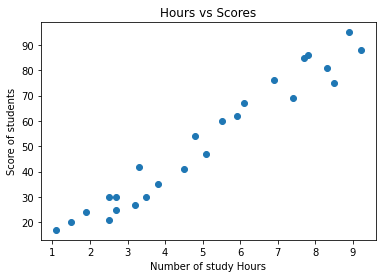

In [6]:
plt.scatter(data['Hours'],data['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Number of study Hours')
plt.ylabel('Score of students')
plt.show()

# Preprocessing the data

In [7]:
#Dividing the data into independent variable and dependent variable
x=data.drop('Scores',1)#independent variable
y=data['Scores']#dependent variable

Now, we have to split the data into training set and testing set

In [8]:
#importing train_test_split method from sklearn library
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Training the model

In [10]:
model=LinearRegression()

In [11]:
#Now we are starting to train the model by using fit function
model.fit(x_train,y_train)
print('Training complete')

Training complete


In [12]:
#Checking the coefficient and the intercept of the line 
print('Coefficient of the line', model.coef_)
print('Intercept of the line', model.intercept_)

Coefficient of the line [9.91065648]
Intercept of the line 2.018160041434662


In [13]:
#Plotting the regression line
line=model.coef_*x + model.intercept_

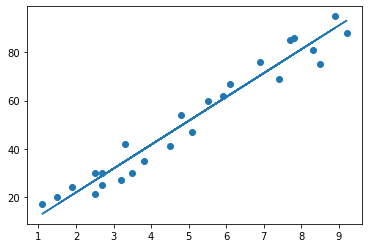

In [14]:
#Visualizing the regression line by plotting
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# Testing the model

Now as we trained our model,we also have to test it.

In [15]:
y_predict=model.predict(x_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
#Comparing the actual value and predicted value
data=pd.DataFrame({'actual': y_test,'predict':y_predict})
data

,actual,predict
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [17]:
#Checking the score 
R_square=model.score(x_test,y_test)
print('R_square score', R_square)

R_square score 0.9454906892105354


Here we are calculating the error ,which tells about the performance of our model.

In [18]:
#calculating the Error
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print('Mean Absolute Error', mae)
print('Mean Squared Error', mse)

Mean Absolute Error 4.183859899002982
Mean Squared Error 21.598769307217456


# Predicting the objective of the task

In [20]:
score=model.predict([[9.25]])
print('Study hours ',9.25 ,"hours per day")
print('Score of student ',score)

Study hours  9.25 hours per day
Score of student  [93.69173249]
